In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1423 - accuracy: 0.9553 - val_loss: 0.0529 - val_accuracy: 0.9839
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0315 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0289 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0254 - val_accuracy: 0.9923


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 2s - loss: 0.0254 - accuracy: 0.9923 - 2s/epoch - 7ms/step

Test accuracy: 0.9922999739646912


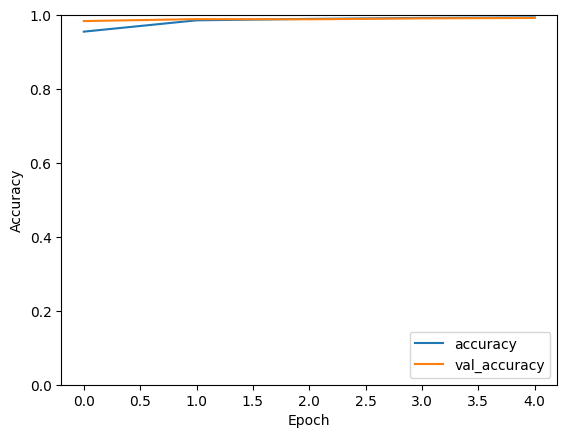

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [13]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):2.0f}%)", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


313/313 [==============================] - 4s 13ms/step


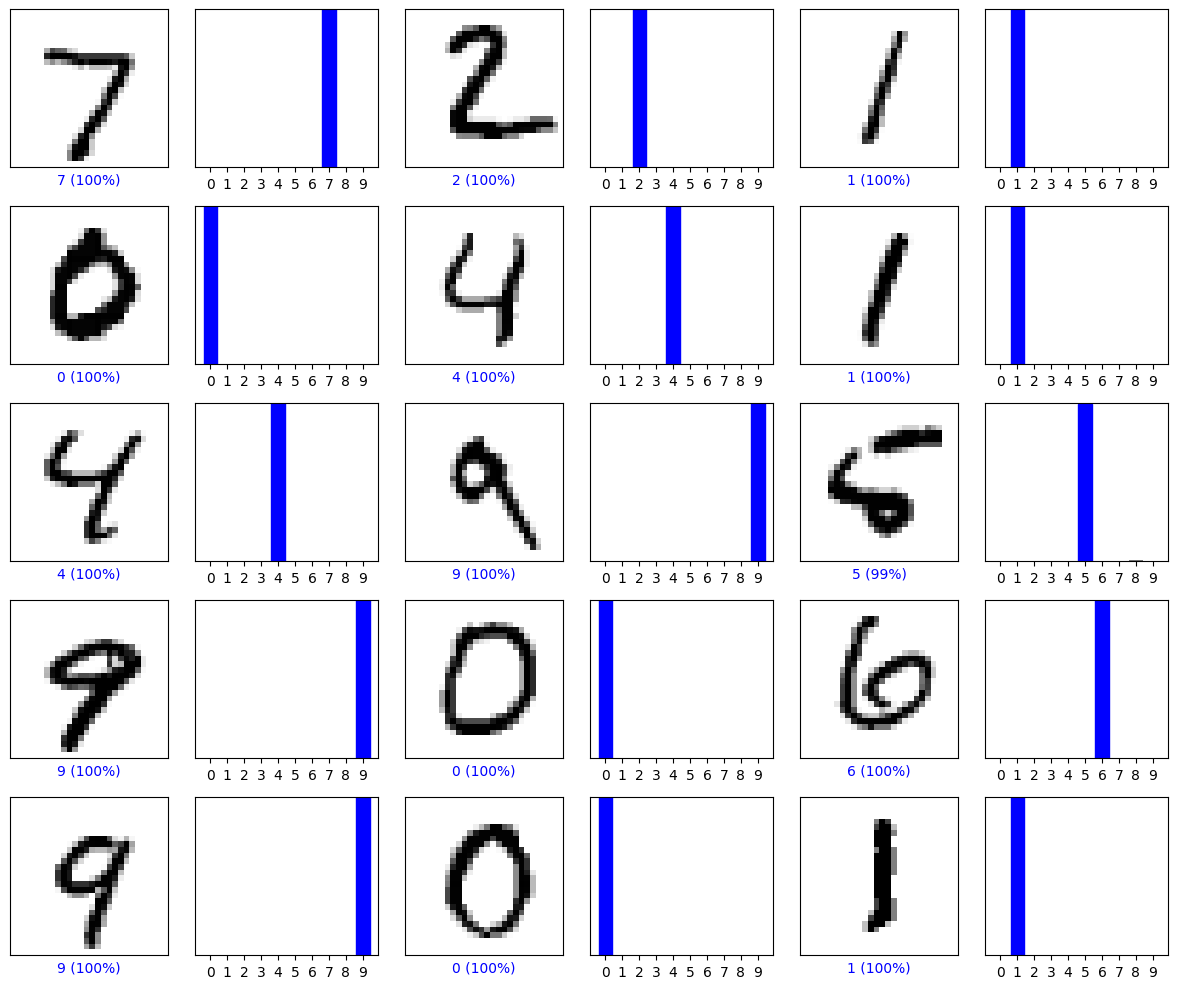

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()
